# Tutorial

## Import modules

In [4]:
import numpy as np
import pandas as pd
from scipy import sparse
import matplotlib.pyplot as plt
from spykesim import editsim
from gendata import gendata
%matplotlib inline

In [11]:
df, binmat = gendata()

Text(0,0.5,'Neuron#')

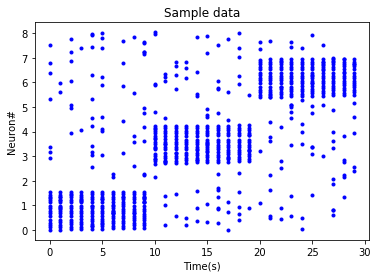

In [7]:
plt.plot(df.neuronid, df.spiketime, "b.")
plt.title("Sample data")
plt.xlabel("Time(s)")
plt.ylabel("Neuron#")

In [106]:
window = 100 # ms
a = 0.01
es = editsim.FromBinMat(alpha=a)
es.gensimmat(
    binmat, window=window, slide=window, numband=4, bandwidth=5, minhash=False
)

[2019-03-03 18:27:34,388] [MainThread] Execution of a function _eval_simvec starts


('times: ', array([   0,  100,  200,  300,  400,  500,  600,  700,  800,  900, 1000,
       1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100,
       2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200,
       3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300,
       4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400,
       5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500,
       6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400, 7500, 7600,
       7700, 7800, 7900, 8000, 8100, 8200, 8300, 8400, 8500, 8600, 8700,
       8800, 8900]))


[2019-03-03 18:27:34,952] [MainThread] submit end
[2019-03-03 18:27:34,958] [MainThread] Progress of the calculation

  0%|          | 0.00/88.0 [00:00<?, ?it/s]
  1%|          | 1.00/88.0 [00:00<00:27, 3.18it/s]
 28%|██▊       | 25.0/88.0 [00:00<00:14, 4.46it/s]
 56%|█████▌    | 49.0/88.0 [00:00<00:06, 6.21it/s]
 83%|████████▎ | 73.0/88.0 [00:01<00:01, 8.62it/s]
100%|██████████| 88.0/88.0 [00:01<00:00, 66.0it/s][2019-03-03 18:27:36,339] [MainThread] Progress of the aggregation

0it [00:00, ?it/s]
88it [00:00, 68913.14it/s][2019-03-03 18:27:36,345] [MainThread] calculation end


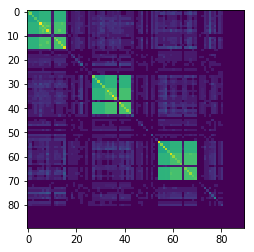

In [108]:
plt.imshow(es.simmat)